In [9]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
%run phasedecoder907.ipynb
from src.folder_handler import *
from src.cort_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
import math
import pickle
import scipy as spicy
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from src.wiener_filter import *
from matplotlib.pyplot import cm
from scipy import signal


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
with open('/mnt/c/oobootoo/rat-fes/data/pickles/3results-gregintact_729_session.pkl', 'rb') as inp:
    session729 = pickle.load(inp)
rates729 = session729.data['rates']
angles729 = session729.data['angles']
coords729 = session729.data['coords']

with open('/mnt/c/oobootoo/rat-fes/data/pickles/3results-gregintact_818_session.pkl', 'rb') as inp:
    session818 = pickle.load(inp)
rates818 = session818.data['rates']
angles818 = session818.data['angles']
coords818 = session818.data['coords']

with open('/mnt/c/oobootoo/rat-fes/data/pickles/3results-gregintact_825_session.pkl', 'rb') as inp:
    session825 = pickle.load(inp)
rates825 = session825.data['rates']
angles825 = session825.data['angles']
coords825 = session825.data['coords']

with open('/mnt/c/oobootoo/rat-fes/data/pickles/3results-gregintact_901_session.pkl', 'rb') as inp:
    session901 = pickle.load(inp)
rates901 = session901.data['rates']
angles901 = session901.data['angles']
coords901 = session901.data['coords']

In [46]:
with open('/mnt/c/oobootoo/rat-fes/data/pickles/results-oldgreginjured_909_session.pkl', 'rb') as inp:
    session909 = pickle.load(inp)
rates909 = session909.data['rates']
angles909 = session909.data['angles']
coords909 = session909.data['coords']

with open('/mnt/c/oobootoo/rat-fes/data/pickles/results-oldgreginjured_914_session.pkl', 'rb') as inp:
    session914 = pickle.load(inp)
rates914 = session914.data['rates']
angles914 = session914.data['angles']
coords914 = session914.data['coords']

In [47]:
arctans729, phase_list729, H_sin729, H_cos729 = phase_train(rates729, angles729)
tsf729 = np.linspace(0, (phase_list729.shape[0]*50)/1000,phase_list729.shape[0])
absphase729 = abs(phase_list729 - 180)
absarctan729 = abs(arctans729 -180)

arctans818, phase_list818, H_sin818, H_cos818 = phase_train(rates818, angles818)
tsf818 = np.linspace(0, (phase_list818.shape[0]*50)/1000,phase_list818.shape[0])
absphase818 = abs(phase_list818 - 180)
absarctan818 = abs(arctans818 -180)

arctans825, phase_list825, H_sin825, H_cos825 = phase_train(rates825, angles825)
tsf825 = np.linspace(0, (phase_list825.shape[0]*50)/1000,phase_list825.shape[0])
absphase825 = abs(phase_list825 - 180)
absarctan825 = abs(arctans825 -180)

arctans901, phase_list901, H_sin901, H_cos901 = phase_train(rates901, angles901)
tsf901 = np.linspace(0, (phase_list901.shape[0]*50)/1000,phase_list901.shape[0])
absphase901 = abs(phase_list901 - 180)
absarctan901 = abs(arctans901 -180)

In [48]:
# arctans901, phase_list901, H_sin901, H_cos901 = phase_train(rates901, angles901)
# tsf901 = np.linspace(0, (phase_list901.shape[0]*50)/1000,phase_list901.shape[0])
# absphase901 = abs(phase_list901 - 180)
# absarctan901 = abs(arctans901 -180)

# arctans901, phase_list901, H_sin901, H_cos901 = phase_train(rates901, angles901)
# tsf901 = np.linspace(0, (phase_list901.shape[0]*50)/1000,phase_list901.shape[0])
# absphase901 = abs(phase_list901 - 180)
# absarctan901 = abs(arctans901 -180)

<bound method Figure.tight_layout of <Figure size 1200x800 with 4 Axes>>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
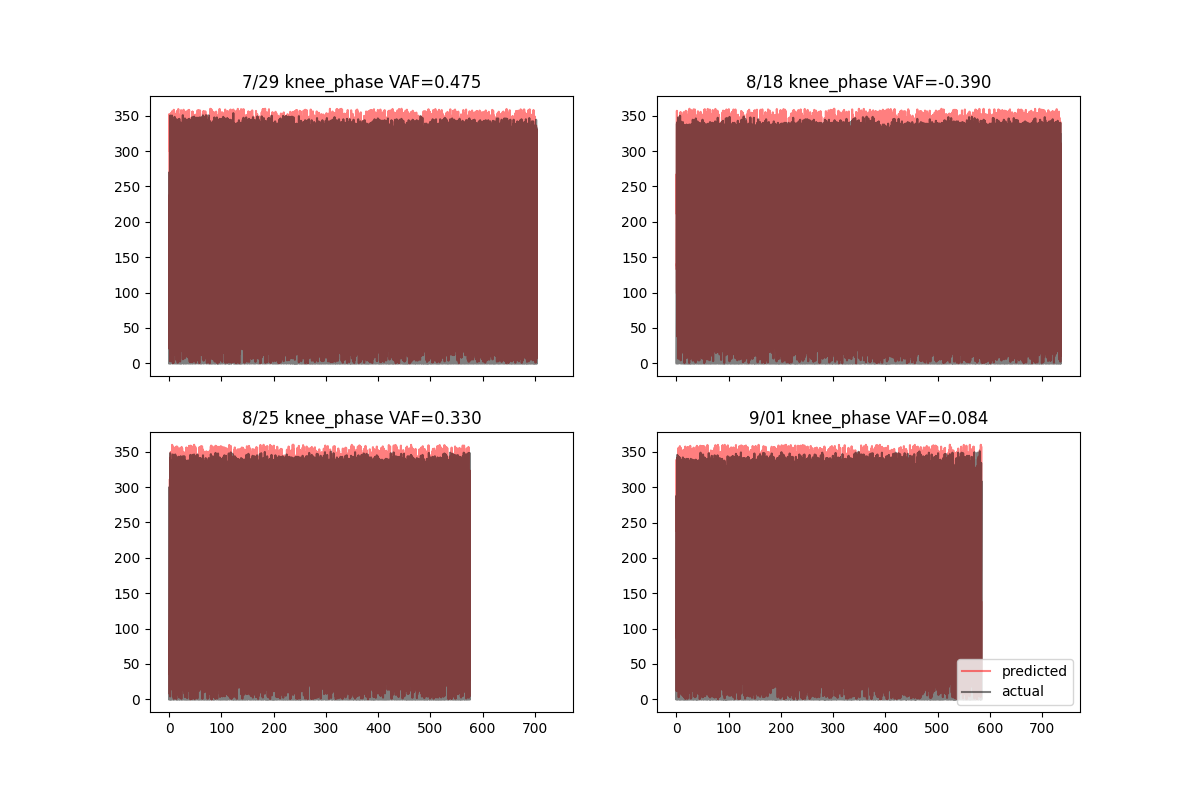

In [49]:
fig512, ax = plt.subplots(2, 2, figsize=(12,8), sharex = True)
ax[0,0].set_title('7/29 knee_phase VAF=' + "{0:.3f}".format(vaf(absphase729[:,1],absarctan729[:,1])))
ax[0,0].plot(tsf729, arctans729[:,1], c='r', alpha=0.5, label = "predicted")
ax[0,0].plot(tsf729, phase_list729[:,1], c='k', alpha=0.5, label = "actual")
# ax[0,0].legend(loc="upper left")
ax[0,1].set_title('8/18 knee_phase VAF=' + "{0:.3f}".format(vaf(absphase818[:,1],absarctan818[:,1])))
ax[0,1].plot(tsf818, arctans818[:,1], c='r', alpha=0.5, label = "predicted")
ax[0,1].plot(tsf818, phase_list818[:,1], c='k', alpha=0.5, label = "actual")
# ax[0,1].legend(loc="upper left")
ax[1,0].set_title('8/25 knee_phase VAF=' + "{0:.3f}".format(vaf(absphase825[:,1],absarctan825[:,1])))
ax[1,0].plot(tsf825, arctans825[:,1], c='r', alpha=0.5, label = "predicted")
ax[1,0].plot(tsf825, phase_list825[:,1], c='k', alpha=0.5, label = "actual")
# ax[1,0].legend(loc="upper left")
ax[1,1].set_title('9/01 knee_phase VAF=' + "{0:.3f}".format(vaf(absphase901[:,1],absarctan901[:,1])))
ax[1,1].plot(tsf901, arctans901[:,1], c='r', alpha=0.5, label = "predicted")
ax[1,1].plot(tsf901, phase_list901[:,1], c='k', alpha=0.5, label = "actual")
ax[1,1].legend(loc="lower right")
fig512.tight_layout


<bound method Figure.tight_layout of <Figure size 1200x800 with 4 Axes>>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
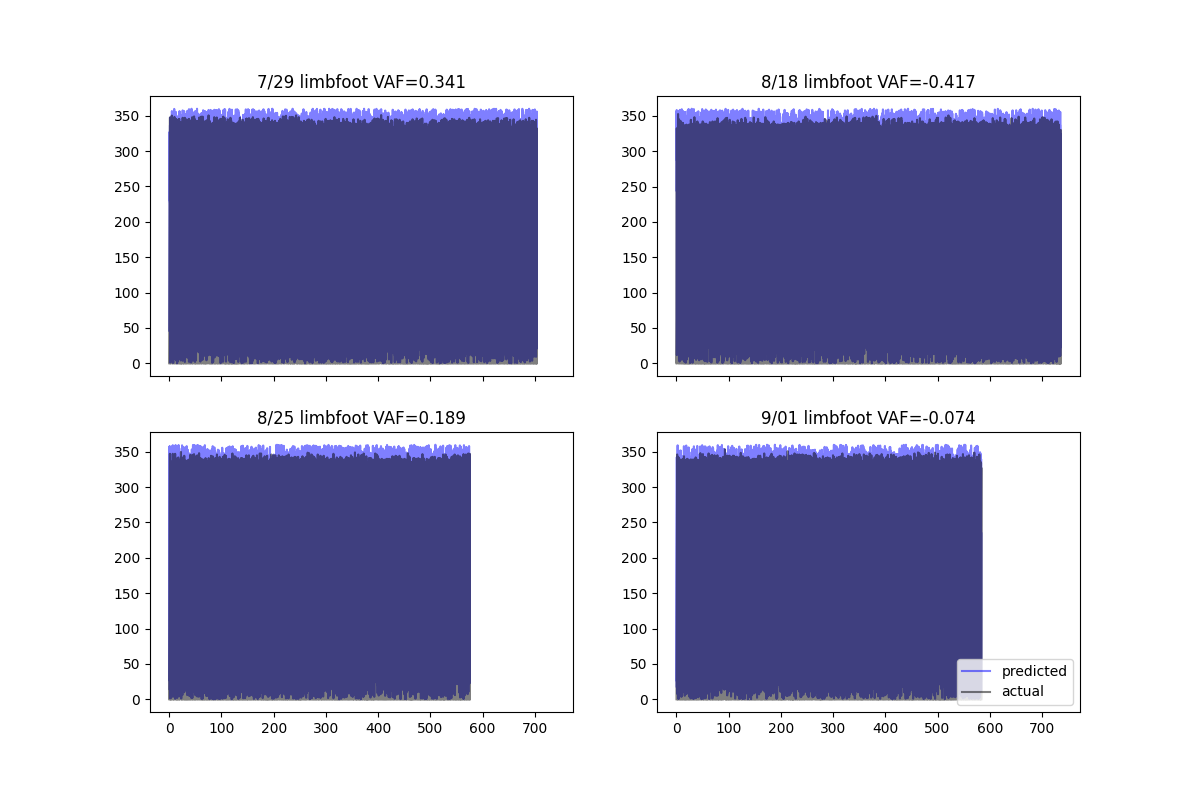

In [50]:
fig513, ax = plt.subplots(2, 2, figsize=(12,8), sharex = True)
ax[0,0].set_title('7/29 limbfoot VAF=' + "{0:.3f}".format(vaf(absphase729[:,3],absarctan729[:,3])))
ax[0,0].plot(tsf729, arctans729[:,3], c='b', alpha=0.5, label = "predicted")
ax[0,0].plot(tsf729, phase_list729[:,3], c='k', alpha=0.5, label = "actual")
# ax[0,0].legend(loc="upper left")
ax[0,1].set_title('8/18 limbfoot VAF=' + "{0:.3f}".format(vaf(absphase818[:,3],absarctan818[:,3])))
ax[0,1].plot(tsf818, arctans818[:,3], c='b', alpha=0.5, label = "predicted")
ax[0,1].plot(tsf818, phase_list818[:,3], c='k', alpha=0.5, label = "actual")
# ax[0,1].legend(loc="upper left")
ax[1,0].set_title('8/25 limbfoot VAF=' + "{0:.3f}".format(vaf(absphase825[:,3],absarctan825[:,3])))
ax[1,0].plot(tsf825, arctans825[:,3], c='b', alpha=0.5, label = "predicted")
ax[1,0].plot(tsf825, phase_list825[:,3], c='k', alpha=0.5, label = "actual")
# ax[1,0].legend(loc="upper left")
ax[1,1].set_title('9/01 limbfoot VAF=' + "{0:.3f}".format(vaf(absphase901[:,3],absarctan901[:,3])))
ax[1,1].plot(tsf901, arctans901[:,3], c='b', alpha=0.5, label = "predicted")
ax[1,1].plot(tsf901, phase_list901[:,3], c='k', alpha=0.5, label = "actual")
ax[1,1].legend(loc="lower right")
fig512.tight_layout
